In [1]:
import torch.utils.data as tdata
import torch
import numpy as np
from pathlib import Path

c:\Users\johnd\anaconda3\envs\stanford\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
class Dataset0D(tdata.Dataset):
    
    def __init__(self, input_file, output_file):
        self.input = np.load(input_file)
        self.output= np.load(output_file)
        
    def __len__(self):
        return len(self.input)
    
    def __getitem__(self, idx):
        return torch.from_numpy(self.input[idx]).float(), torch.from_numpy(self.output[idx]).float()


In [3]:
dir = Path('../data/healthy/0080_0001/jc_solver_dir_0/artificial_stenosis/Manual_0')

sim_dataset = Dataset0D(dir / 'training_data' / 'input.npy', dir / 'training_data' / 'output.npy')

In [8]:
import matplotlib.pyplot as plt

In [13]:
sim_dataset.input[:, 0]

array([2.45953293, 1.33703517, 1.70460677, ..., 1.70454943, 1.33711663,
       2.45937904])

In [51]:
inp, output = sim_dataset[0]

In [53]:
output

tensor([1.3257e+04, 3.0681e+01, 1.2827e+04, 3.0681e+01, 1.2627e+04, 3.0681e+01,
        1.2626e+04, 1.6537e+00, 1.2627e+04, 6.5497e-01, 1.2627e+04, 6.5498e-01,
        1.2627e+04, 6.5499e-01, 1.1504e+04, 1.8707e+00, 1.3028e+04, 1.4437e+00,
        1.0998e+04, 1.1122e+01, 1.0460e+04, 7.8337e-01, 1.2103e+04, 2.1990e+00,
        1.1857e+04, 1.3980e+00, 1.1658e+04, 1.3981e+00, 1.1407e+04, 1.3981e+00,
        1.2590e+04, 7.2266e-01, 1.1535e+04, 5.8417e-01, 1.2291e+04, 1.4076e+00,
        1.2277e+04, 6.8528e-01, 1.2284e+04, 5.3874e-01, 1.2237e+04, 5.3876e-01,
        1.2173e+04, 5.3877e-01, 1.1733e+04, 1.2276e+00, 1.1701e+04, 1.3855e+00])

# Check Uniformity of Input

(array([630., 631., 630., 630., 630., 630., 630., 630., 631., 630., 630.,
        630., 631., 630., 630., 630., 630., 630., 630., 630., 630., 630.,
        630., 630., 630., 631.]),
 array([1.00006653, 1.06090917, 1.1217518 , 1.18259443, 1.24343707,
        1.3042797 , 1.36512233, 1.42596497, 1.4868076 , 1.54765023,
        1.60849287, 1.6693355 , 1.73017813, 1.79102077, 1.8518634 ,
        1.91270603, 1.97354867, 2.0343913 , 2.09523393, 2.15607657,
        2.2169192 , 2.27776183, 2.33860447, 2.3994471 , 2.46028973,
        2.52113237, 2.581975  ]),
 <BarContainer object of 26 artists>)

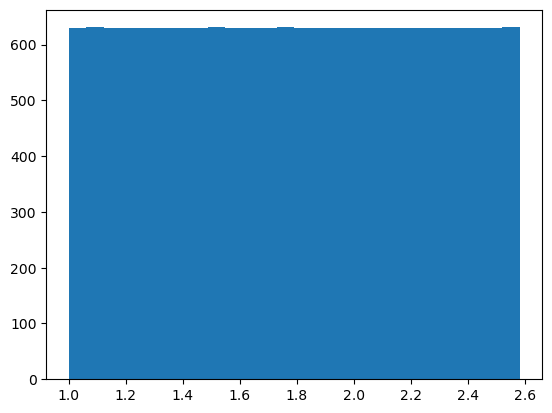

In [38]:
# uniform
plt.hist(sim_dataset.input[:, 3], bins = 'auto')

# Check Distributions of individual Pressures and FLows

In [39]:
from scipy.stats import norm
import scipy.stats as stats

In [55]:
def sep_QF(out):
    ''' for a single sample, seperates pressures,flows'''
    return out[::2], out[1::2]


In [57]:
output

tensor([1.3257e+04, 3.0681e+01, 1.2827e+04, 3.0681e+01, 1.2627e+04, 3.0681e+01,
        1.2626e+04, 1.6537e+00, 1.2627e+04, 6.5497e-01, 1.2627e+04, 6.5498e-01,
        1.2627e+04, 6.5499e-01, 1.1504e+04, 1.8707e+00, 1.3028e+04, 1.4437e+00,
        1.0998e+04, 1.1122e+01, 1.0460e+04, 7.8337e-01, 1.2103e+04, 2.1990e+00,
        1.1857e+04, 1.3980e+00, 1.1658e+04, 1.3981e+00, 1.1407e+04, 1.3981e+00,
        1.2590e+04, 7.2266e-01, 1.1535e+04, 5.8417e-01, 1.2291e+04, 1.4076e+00,
        1.2277e+04, 6.8528e-01, 1.2284e+04, 5.3874e-01, 1.2237e+04, 5.3876e-01,
        1.2173e+04, 5.3877e-01, 1.1733e+04, 1.2276e+00, 1.1701e+04, 1.3855e+00])

In [59]:
inp.shape

torch.Size([24])

In [60]:
output.shape

torch.Size([48])

In [56]:
sep_QF(output)

(tensor([13257.2441, 12826.5811, 12627.0186, 12626.4668, 12627.0000, 12626.9971,
         12626.9902, 11504.4258, 13028.0605, 10997.7549, 10459.5098, 12103.4395,
         11857.1738, 11657.9258, 11406.7969, 12590.0791, 11535.1494, 12290.5303,
         12276.5596, 12284.3105, 12236.9346, 12173.1660, 11733.1465, 11701.1367]),
 tensor([30.6809, 30.6810, 30.6813,  1.6537,  0.6550,  0.6550,  0.6550,  1.8707,
          1.4437, 11.1216,  0.7834,  2.1990,  1.3980,  1.3981,  1.3981,  0.7227,
          0.5842,  1.4076,  0.6853,  0.5387,  0.5388,  0.5388,  1.2276,  1.3855]))

In [44]:
# extract distribution for a single points pressures
point = 2

pressures = sim_dataset.output[:, point]
flows = sim_dataset.output[:, point+1]

In [45]:
pressures.min()

11079.569090807767

In [46]:
pressures.max()

16029.459836443413

((array([-3.9309499 , -3.71230692, -3.59255913, ...,  3.59255913,
          3.71230692,  3.9309499 ]),
  array([11079.56909081, 11082.28142116, 11108.61384815, ...,
         15911.73987717, 15975.01102071, 16029.45983644])),
 (712.7648597521363, 13033.958286086265, 0.9942226553757153))

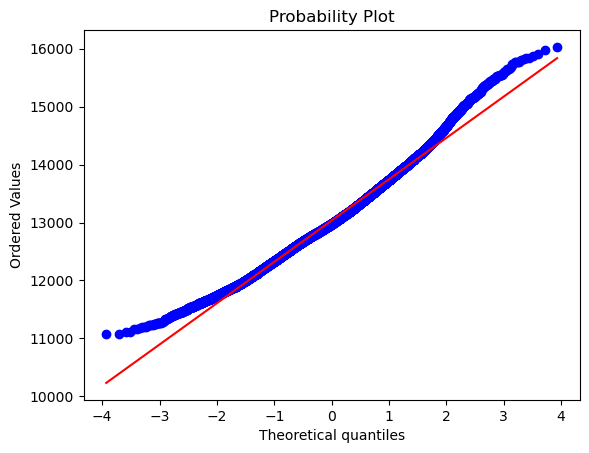

In [47]:
# qq plot for 0th location pressures
fig, ax = plt.subplots(1, 1)
stats.probplot(pressures, dist = 'norm',plot = ax)

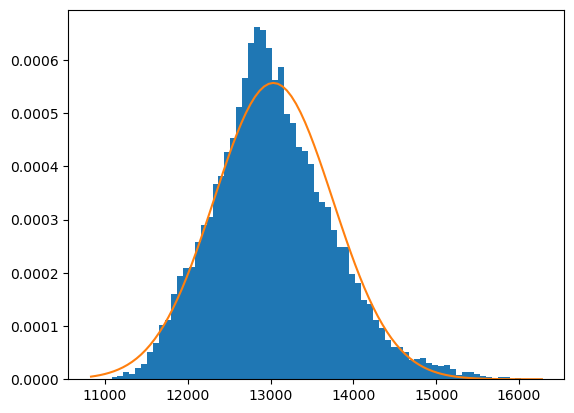

In [71]:
plt.hist(pressures, bins = 'auto', density=True)
x_min, x_max = plt.xlim()
x = np.linspace(x_min, x_max, 100)
mean, std = norm.fit(pressures)
plt.plot(x, norm.pdf(x, mean, std ))

((array([-3.9309499 , -3.71230692, -3.59255913, ...,  3.59255913,
          3.71230692,  3.9309499 ]),
  array([11079.56909081, 11082.28142116, 11108.61384815, ...,
         15911.73987717, 15975.01102071, 16029.45983644])),
 (712.7648597521363, 13033.958286086265, 0.9942226553757153))

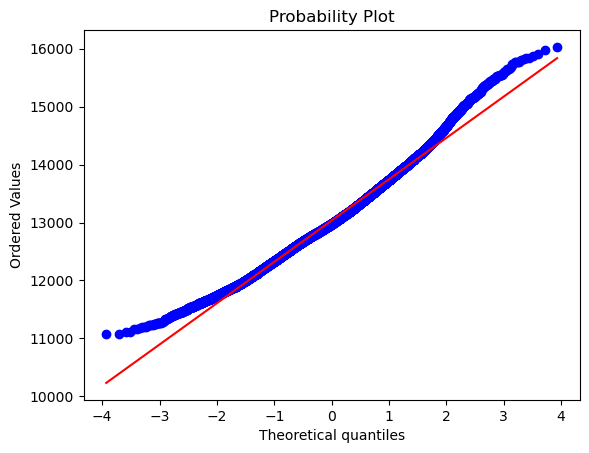

In [49]:
# qq plot for 0th location flows
fig, ax = plt.subplots(1, 1)
stats.probplot(pressures, dist = 'norm',plot = ax)

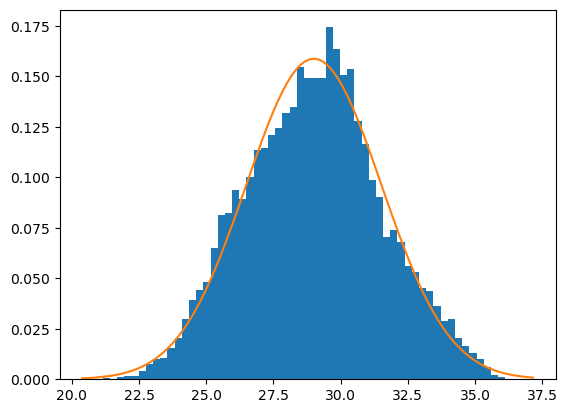

In [70]:
plt.hist(flows, bins = 'auto', density=True)
x_min, x_max = plt.xlim()
x = np.linspace(x_min, x_max, 100)
mean, std = norm.fit(flows)
plt.plot(x, norm.pdf(x, mean, std ))

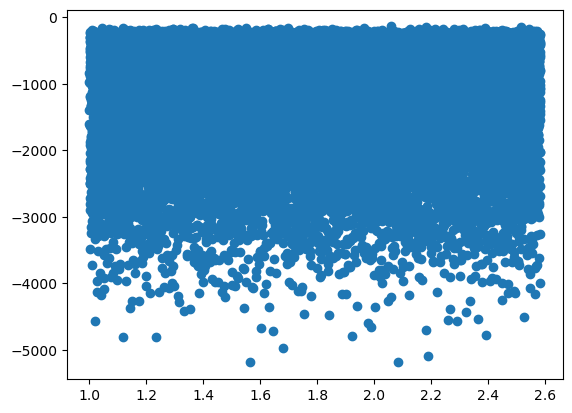

In [99]:
point = 10
plt.scatter(sim_dataset.input[:,point], sim_dataset.output[:,point]-sim_dataset.output[:,0])

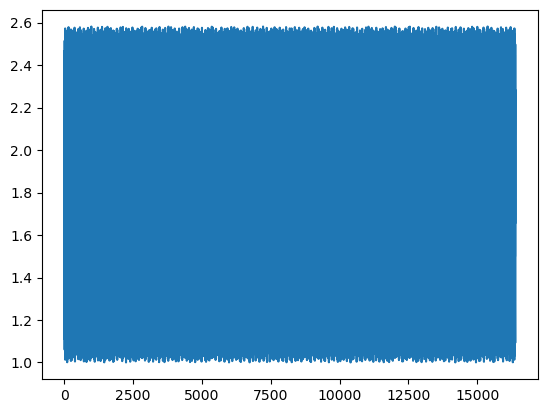

In [65]:
plt.plot(range(len(sim_dataset.input[:, 0]) ), sim_dataset.input[:, 3])

In [ ]:
for i in range(sim_dataset.input[0]):
    for i